## 웹크롤링 방법
* 동적페이지 : URL의 변경 없이 페이지의 내용이 변경 : json
* 정적페이지 : URL이 변경되면서 페이지의 내용이 변경: html

In [1]:
import pandas as pd
import requests

#### 네이버 주가 데이터 수집
- 동적페이지 : JSON

In [2]:
# 1. 웹서비스 분석 : 개발자 도구 : URL
page_size, page = 20, 1
url = f"https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}"
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=20&page=1'

In [3]:
# 2. 서버에 데이터 요청 : request(URL) -> response(JSON(str))
response = requests.get(url)
response #성공이면 200번대, 실패면400대 or 500대

<Response [200]>

In [4]:
response.text[:500] # response.text() : 응답을 읽고 텍스트를 반환

'[{"localTradedAt":"2022-02-21","closePrice":"2,737.53","compareToPreviousClosePrice":"-6.99","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.25","openPrice":"2,706.65","highPrice":"2,739.95","lowPrice":"2,694.90"},{"localTradedAt":"2022-02-18","closePrice":"2,744.52","compareToPreviousClosePrice":"0.43","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"0.02","openPrice":"2,714.52","highPrice":"2,747.08","lowPrice":"2'

In [5]:
# 3. JSON(str) > parsing > dict, list > DataFrame

In [6]:
data = response.json() # response.json() : 응답을 JSON 형태로 파싱
data
# type(data)

[{'localTradedAt': '2022-02-21',
  'closePrice': '2,737.53',
  'compareToPreviousClosePrice': '-6.99',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-0.25',
  'openPrice': '2,706.65',
  'highPrice': '2,739.95',
  'lowPrice': '2,694.90'},
 {'localTradedAt': '2022-02-18',
  'closePrice': '2,744.52',
  'compareToPreviousClosePrice': '0.43',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.02',
  'openPrice': '2,714.52',
  'highPrice': '2,747.08',
  'lowPrice': '2,711.88'},
 {'localTradedAt': '2022-02-17',
  'closePrice': '2,744.09',
  'compareToPreviousClosePrice': '14.41',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.53',
  'openPrice': '2,735.11',
  'highPrice': '2,770.66',
  'lowPrice': '2,711.99'},
 {'localTradedAt': '2022-02-16',
  'closePrice': '2,729.68',
  'compareToPreviousClosePrice': '53.14',
  'compareToPreviousPrice'

In [7]:
columns = ["localTradedAt", "closePrice"]
kospi_df = pd.DataFrame(data)[columns]
kospi_df.head()

,localTradedAt,closePrice
0,2022-02-21,"2,737.53"
1,2022-02-18,"2,744.52"
2,2022-02-17,"2,744.09"
3,2022-02-16,"2,729.68"
4,2022-02-15,"2,676.54"


In [8]:
# 4. 함수로 만들기

In [9]:
def stock_price(code="KOSPI", page_size=20, page=1):
    """
    params: code(KOSPI or KOSDAQ)
    """
    url = f"https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}"
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data)[["localTradedAt", "closePrice"]]

In [10]:
df = stock_price("KOSDAQ")
df.head(2)

,localTradedAt,closePrice
0,2022-02-21,881.69
1,2022-02-18,881.71


In [11]:
# 5. 실습 : 원달러 환율 데이터 수집

In [12]:
def exchange_rate(code="FX_USDKRW", page_size=20, page=1):
    url = f"https://api.stock.naver.com/marketindex/exchange/{code}/prices?page={page}&pageSize={page_size}"
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data)[["localTradedAt", "closePrice"]]

In [13]:
usd = exchange_rate()
usd.head()

,localTradedAt,closePrice
0,2022-02-21,"1,193.90"
1,2022-02-18,"1,195.50"
2,2022-02-17,"1,197.50"
3,2022-02-16,"1,198.00"
4,2022-02-15,"1,197.50"


In [14]:
# 시각화 및 상관관계 분석

In [15]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 데이터 수집 : kospi, kosdaq, usd
kospi = stock_price()
kosdaq = stock_price("KOSDAQ")
usd = exchange_rate()

In [18]:
# 데이터 전처리 : str > float

In [19]:
kospi.dtypes

localTradedAt    object
closePrice       object
dtype: object

In [20]:
kospi["closePrice"] = kospi["closePrice"].apply(lambda data: float(data.replace(",","")))
kosdaq["closePrice"] = kosdaq["closePrice"].apply(lambda data: float(data.replace(",","")))
usd["closePrice"] = usd["closePrice"].apply(lambda data: float(data.replace(",","")))


In [21]:
usd.dtypes

localTradedAt     object
closePrice       float64
dtype: object

In [22]:
# lambda : 일회성 함수 -> lambda params: return

In [23]:
def plus(num1, num2):
    return num1 + num2

def minus(num1, num2):
    return num1 - num2

def calc(func, num1, num2):
    return func(num1, num2)

In [24]:
calc(plus, 1, 2)

3

In [25]:
calc(lambda num1, num2 : num1 + num2, 1, 2)

3

In [26]:
# apply(func) : 모든 데이터에 func을 적용시킨 결과를 출력

In [27]:
df = kospi.copy()
df = df.rename(columns={"localTradedAt":"date", "closePrice":"kospi"})
df["kosdaq"] = kosdaq["closePrice"]
df["usd"] = usd["closePrice"]
df.head()

,date,kospi,kosdaq,usd
0,2022-02-21,2737.53,881.69,1193.9
1,2022-02-18,2744.52,881.71,1195.5
2,2022-02-17,2744.09,874.22,1197.5
3,2022-02-16,2729.68,878.15,1198.0
4,2022-02-15,2676.54,839.92,1197.5


In [28]:
df.dtypes

date       object
kospi     float64
kosdaq    float64
usd       float64
dtype: object

In [29]:
# 그래프 그리기

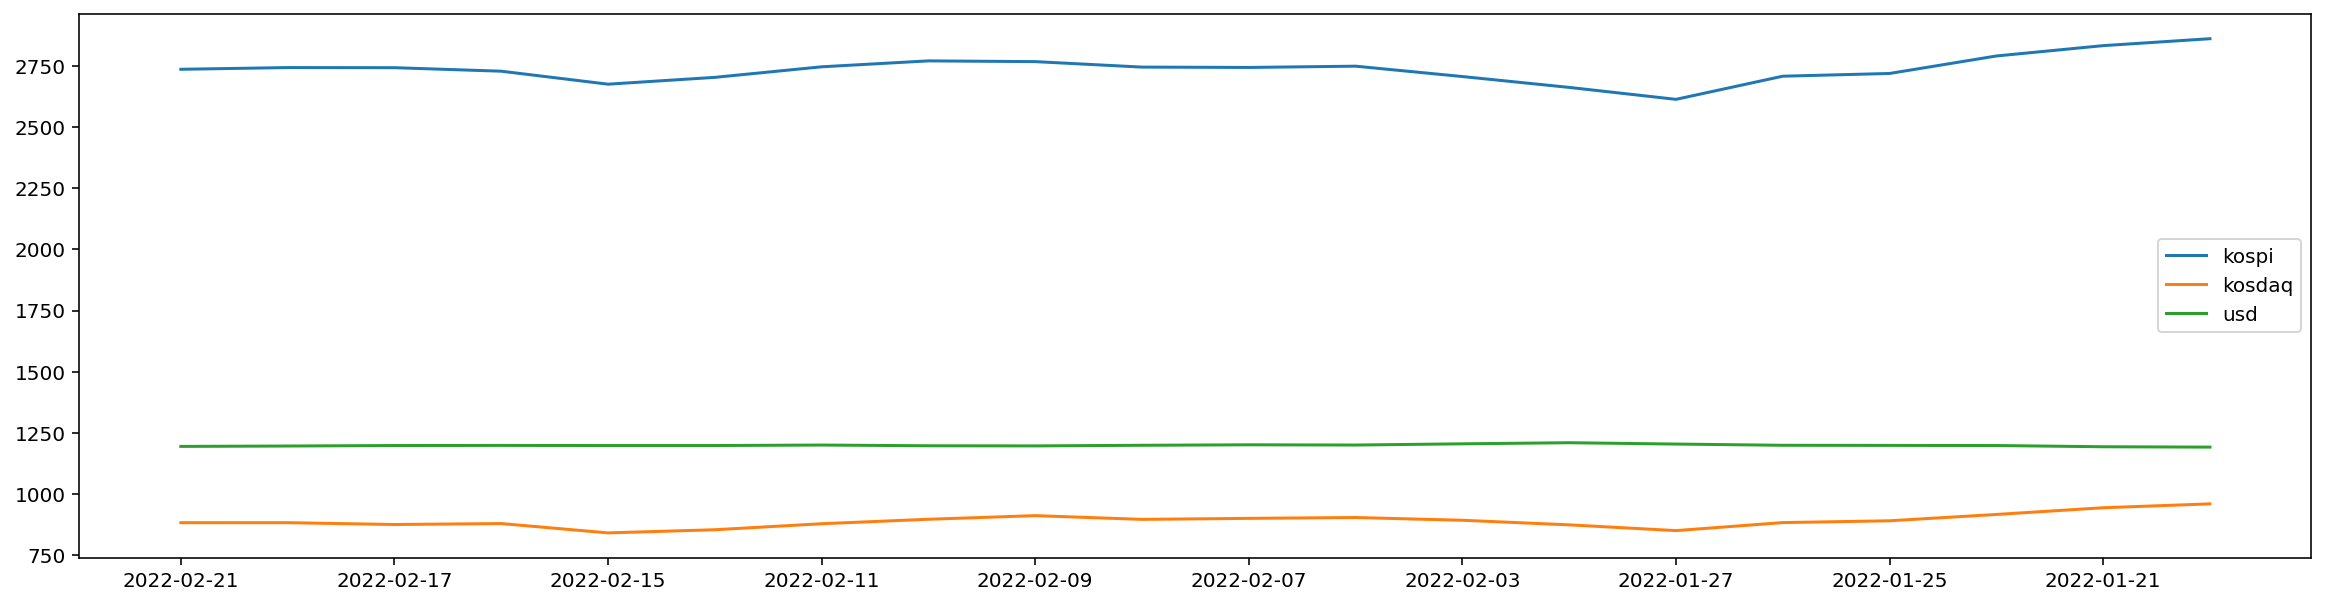

In [30]:
plt.figure(figsize=(20,5))

# plt.plot(df["date"], df["kospi"], label="kospi")
# plt.plot(df["date"], df["kosdaq"], label="kosdaq")
# plt.plot(df["date"], df["usd"], label="usd")

for column in df.columns[1:]:
    plt.plot(df["date"], df[column], label=column)

plt.xticks(df["date"][::2])
plt.legend()
plt.show()

In [31]:
# 데이터 스케일링 : min max scale
# z = ( x - min(x) ) / ( max(X) - min(x) ) : 0 <= z < = 1

In [32]:
from sklearn.preprocessing import minmax_scale

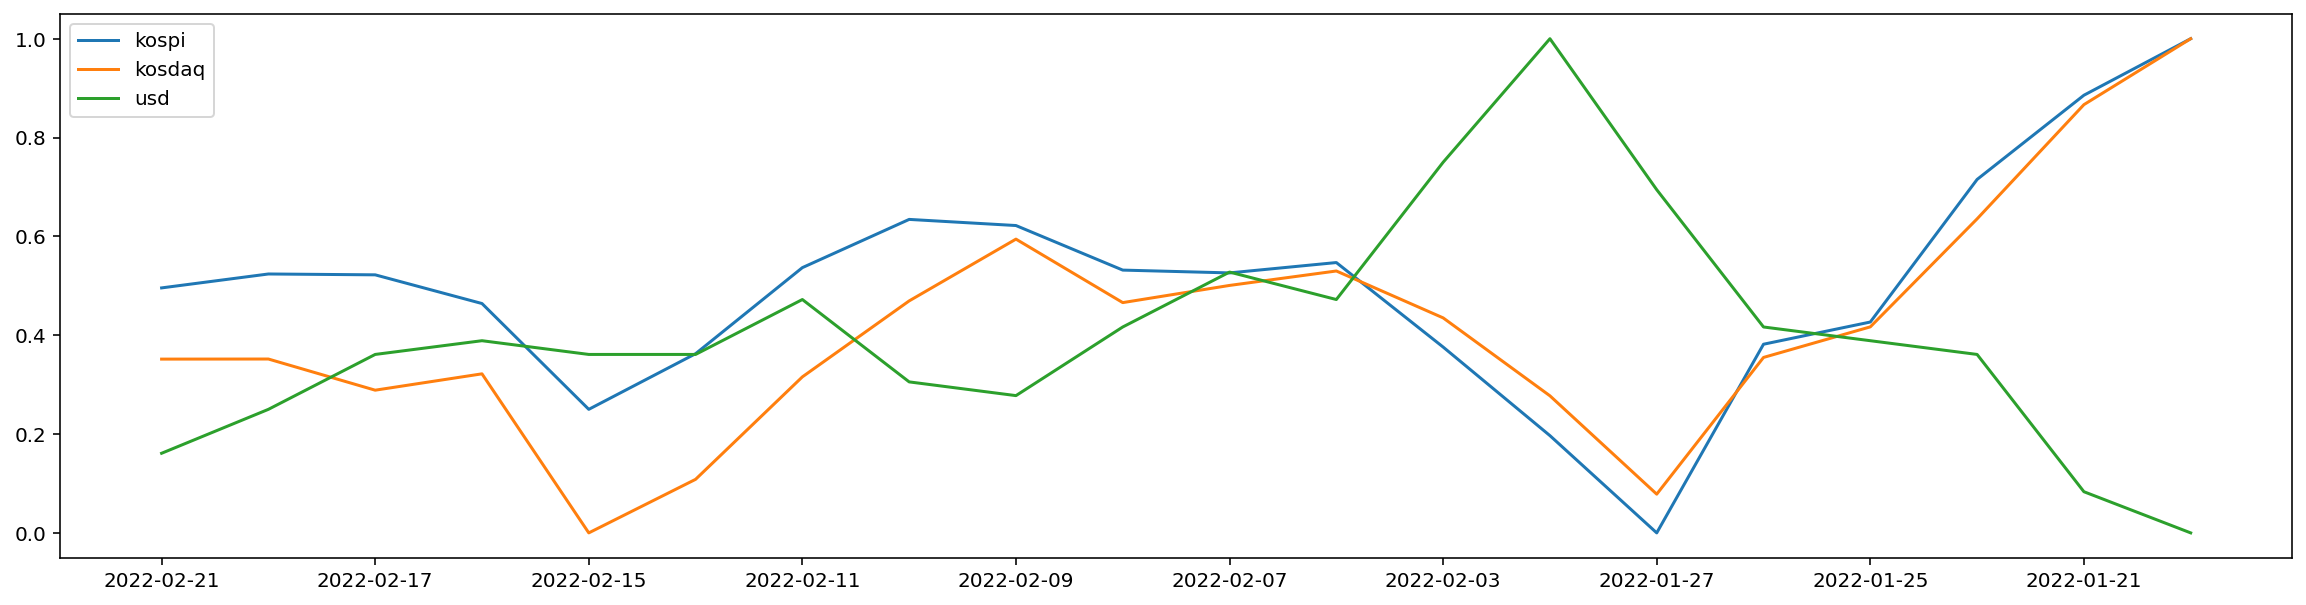

In [33]:
plt.figure(figsize=(20,5))

for column in df.columns[1:]:
    plt.plot(df["date"], minmax_scale(df[column]), label=column)

plt.xticks(df["date"][::2])
plt.legend()
plt.show()

In [34]:
# 상관관계 분석

# 상관계수 해석
# 상관계수 : 0과 가까울수록 두 데이터는 관계 X
# 1과 가까울수록 두 데이터는 강한 양의 상관관계
# -1과 가까울수록 두 데이터는 강한 음의 상관관계

In [35]:
# kospi-kosdaq : 0.892 : 강한 양의 상관관계
# kospi-usd : -0.745 : 강한 음의 상관관계

In [36]:
df[df.columns[1:]].corr()

,kospi,kosdaq,usd
kospi,1.000000,0.892678,-0.743306
kosdaq,0.892678,1.000000,-0.501841
usd,-0.743306,-0.501841,1.000000


* 환율이 떨어졌을때(달러가치가 낮아졌을 때)코스피 코스닥이 높아지므로 주식을 팔아서 이득을 취함
* 환율이 높아졌을때(달러가치가 높아졌을 때) 코스피 코스닥이 떨어지므로 주식을 사서 이득을 취함